In [137]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emojidict/Emoji_Dict (2).p
/kaggle/input/sentiment-train-test/train (1).csv
/kaggle/input/sentiment-train-test/test (1).csv


***Upto stopwords and label encoding***

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [139]:
df_train=pd.read_csv('/kaggle/input/sentiment-train-test/train (1).csv')
df_test=pd.read_csv('/kaggle/input/sentiment-train-test/test (1).csv')

In [140]:
print(df_train.head(10))
print(df_test.head(10))

                                                text label
0  बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...     2
1  1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...     1
2  होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...     2
3  खैँ MBJC प्रति कित्तामा रू,10/-ले बढेर आज रू,1...     2
4                                       राम्रो भयो️️     1
5  मध्यभोटेकोशिको शेयर ,, कर्मचारी संञ्चयकोष का स...     2
6                जानकारीको लागि धन्यवाद रामहरी ब्रदर     1
7         हाईड्रो र फाइनान्स बुम बुम भन्न छोडिएछ त ?     2
8  Profit booking ले यत्रो अङ्कको गिरावट त नआउनु ...     2
9  फेरि भर्चुअल मिटिङ कहिले हुन्छ दाजु हजुर जानका...     2
                                                text label
0  असाध्यै राम्रो कार्यक्रम आयोजना गरिएको छ हजुरह...     1
1  राम्रो कार्यक्रम, पहिलो सिजनले समेटेको कार्यक्...     1
2  महानायक राजेश हमाल तपाई साँच्चै धन्यवादको पात्...     1
3  जातको प्रष्न बाट सबै जनालाई सकरात्मक सन्देश मि...     1
4  बहसको सुरुवात भएको छ, अझै जोडदार रुपमा गर्नुपर...    

In [141]:
print(df_train.info())
print(df_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5999 non-null   object
 1   label   6000 non-null   object
dtypes: object(2)
memory usage: 93.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1995 non-null   object
 1   label   1996 non-null   object
dtypes: object(2)
memory usage: 31.3+ KB
None


In [142]:
print(df_train.info())
print(df_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5999 non-null   object
 1   label   6000 non-null   object
dtypes: object(2)
memory usage: 93.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1995 non-null   object
 1   label   1996 non-null   object
dtypes: object(2)
memory usage: 31.3+ KB
None


In [143]:
df_train.isnull().sum()

text     1
label    0
dtype: int64

In [144]:
df_test.isnull().sum()

text     1
label    0
dtype: int64

In [145]:
df_train=df_train.dropna()
df_test=df_test.dropna()

In [146]:
print(df_train)
print(df_test)

                                                   text label
0     बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...     2
1     1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...     1
2     होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...     2
3     खैँ MBJC प्रति कित्तामा रू,10/-ले बढेर आज रू,1...     2
4                                          राम्रो भयो️️     1
...                                                 ...   ...
5995  समाज परिवर्तन गराउन लाई अरु को मुख हेर्ने भन्द...     1
5996  Filmy क्षेत्रमा धेरै गर्नु भयो,,अब समाज र देश ...     2
5997  यस्तै यस्तै कार्यक्रम अझ बढी हुन जरुरी छ कुना ...     2
5998                                 बधाई र सुभकामना ।।     1
5999      कार्यक्रम एकदमै सकारात्मक छ। निरन्तरता पाओस्।     1

[5999 rows x 2 columns]
                                                   text label
0     असाध्यै राम्रो कार्यक्रम आयोजना गरिएको छ हजुरह...     1
1     राम्रो कार्यक्रम, पहिलो सिजनले समेटेको कार्यक्...     1
2     महानायक राजेश हमाल तपाई साँच्चै धन्यवाद

In [147]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

1476
113


In [148]:
df_train=df_train.drop_duplicates()
df_test=df_test.drop_duplicates()

In [149]:
print(df_train)
print(df_test)

                                                   text label
0     बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...     2
1     1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...     1
2     होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...     2
3     खैँ MBJC प्रति कित्तामा रू,10/-ले बढेर आज रू,1...     2
4                                          राम्रो भयो️️     1
...                                                 ...   ...
5995  समाज परिवर्तन गराउन लाई अरु को मुख हेर्ने भन्द...     1
5996  Filmy क्षेत्रमा धेरै गर्नु भयो,,अब समाज र देश ...     2
5997  यस्तै यस्तै कार्यक्रम अझ बढी हुन जरुरी छ कुना ...     2
5998                                 बधाई र सुभकामना ।।     1
5999      कार्यक्रम एकदमै सकारात्मक छ। निरन्तरता पाओस्।     1

[4523 rows x 2 columns]
                                                   text label
0     असाध्यै राम्रो कार्यक्रम आयोजना गरिएको छ हजुरह...     1
1     राम्रो कार्यक्रम, पहिलो सिजनले समेटेको कार्यक्...     1
2     महानायक राजेश हमाल तपाई साँच्चै धन्यवाद

******

In [150]:
df_train.shape

(4523, 2)

In [151]:
df_test.shape

(1882, 2)

***Label Count***

In [152]:
df_train['text'].value_counts()

text
प्रचण्डको सनसनीपूर्ण खुलासा, माधव, बाबुराम, बैद्य र विप्लवसहितको नयाँ पार्टी बनाउने                                                         3
दलाल भगाउ देश बचाउ                                                                                                                          3
यो सामाजिक संजाल मा भुक्नेहरु किन प्रचण्ड को बिरोध गर्छन। बुज्दैनन कि बुज पचाउछन प्रचण्ड कै कारण ले गर्दा यसरी भुक्न पायका छन।              2
हो साथी हरु को जुन अहिले योउतुबे तल कमेन्ट्स गर्न पयको छौ । ।त्यो पनी माओवादी को नै देन हो । ।नभय । ।राजा को पाला म कहाँ बोल्न पैन्थ्योर    2
संघियता खारेज गर्नु पर्छ यसको लागि रा. पा. का नवनिर्वाचित अध्यक्ष राजेन्द्र लिङ्देन लाई साथ सहयोग गर्नु पर्छ।                               2
                                                                                                                                           ..
तपाई चिप्लाउने अंकल 😂🤣😂🤣                                                                                                                    1
द

In [153]:
df_train['label'].value_counts()

label
1     1852
0     1628
2     1034
-        5
20       1
11       1
o        1
--       1
Name: count, dtype: int64

In [154]:
df_test['label'].value_counts()

label
1    860
0    550
2    470
o      1
-      1
Name: count, dtype: int64

In [155]:
valid_labels=['0','1','2']
df_train=df_train[df_train['label'].isin(valid_labels)]
df_test=df_test[df_test['label'].isin(valid_labels)]

In [156]:
print(df_train['label'].value_counts())
print(df_test['label'].value_counts())

label
1    1852
0    1628
2    1034
Name: count, dtype: int64
label
1    860
0    550
2    470
Name: count, dtype: int64


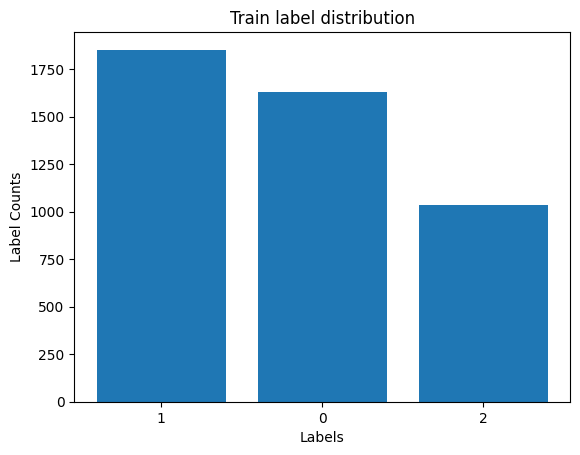

In [157]:
plt.bar(df_train['label'].value_counts().index,df_train['label'].value_counts().values)
plt.xlabel('Labels')
plt.ylabel('Label Counts')
plt.title("Train label distribution")
plt.show()

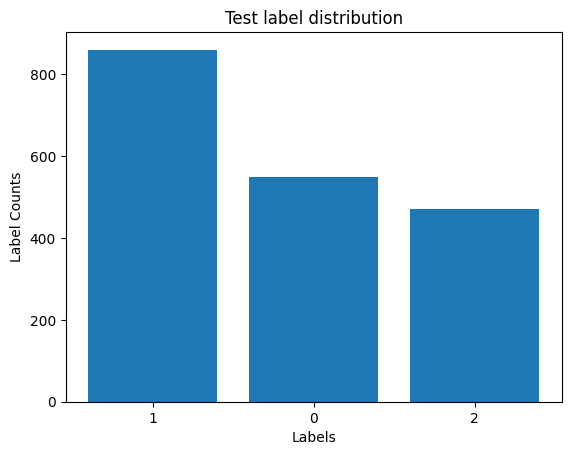

In [158]:
plt.bar(df_test['label'].value_counts().index,df_test['label'].value_counts().values)
plt.xlabel('Labels')
plt.ylabel('Label Counts')
plt.title("Test label distribution")
plt.show()

In [159]:
"""y_train=df_train['label']
y_test=df_test['label']"""

df_train.columns

Index(['text', 'label'], dtype='object')

In [160]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_train['label']= label_encoder.fit_transform(df_train['label'])
df_test['label'] = label_encoder.transform(df_test['label'])

In [163]:
print(df_train['label'].unique())
print(df_test['label'].unique())

[2 1 0]
[1 0 2]


***Removing stopwords***

In [164]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [165]:
from nltk.corpus import stopwords
stop_w= stopwords.words('english')+ stopwords.words('nepali')

In [166]:
def rem_stopWords(text):
    words=text.split()
    final_word=[word for word in words if word not in stop_w]
    return ' '.join(final_word)

In [167]:
#print(rem_stopWords('तपाईंको नाम के हो?'))
#print(rem_stopWords('What is the name of the biggest river in the continent Asia?'))

In [168]:
df_train.columns

Index(['text', 'label'], dtype='object')

In [169]:
df_train['text']=df_train['text'].apply(rem_stopWords)
df_test['text']=df_test['text'].apply(rem_stopWords)

In [170]:
df_test.head(50)

,text,label
0,असाध्यै कार्यक्रम आयोजना गरिएको हजुरहरुको महान...,1
1,"कार्यक्रम, सिजनले समेटेको कार्यक्रम पुरै हेरेँ...",1
2,महानायक राजेश हमाल धन्यवादको पात्र हुनुहुन्छ। ...,1
3,जातको प्रष्न बाट जनालाई सकरात्मक सन्देश मिलोस्...,1
4,"बहसको सुरुवात छ, जोडदार रुपमा लाग्छ ।",1
5,पिडानै पीडा जिवनमा।,0
6,जात्को प्रस्न कार्यक्रम समाज परिवर्तन हेतु चला...,1
7,समाज बदल्ने समाजमा एउटा नयां सकारात्मक सोच ल्य...,1
8,"समस्या ठुलो छ, बहस हुनु । सरकार जातीय बिभेद हट...",1
9,यश नेपाली जनताले जातको नाममा सेवा सुबिधा नलिने...,1


In [173]:
df_train.to_csv('df_train_2.csv', index=False)
df_test.to_csv('df_test_2.csv', index=False)

In [174]:
import os
print(os.getcwd())

/kaggle/working
